# IMPORTANT
### This notebook will not display correctly unless you click the link below
#### The link is a site hosting the file and displaying plotly visualizations.
#### http://nbviewer.jupyter.org/github/RossBrownPhD/Work_Samples_and_Resume/blob/master/02_Python_Code_Packages_and_Libraries.ipynb
#### You can also copy this page url into the main nbviewer page:
#### http://nbviewer.jupyter.org/
#### Don't worry, it's just a click away, and it's worth it.

### Function for iterating over multiple datafiles to extract variables, construct variables, and consolidate into a dataframe

### Pandas for data wrangling throughout

In [1]:
"""Read in 23 files, one for each year 1992-2014. Each year's file contains one line for every 
substance abuse treatment admissions case in the United States that year.
For each file, select the cases for alcoholism admissions in Massachusetts. Select variables of interest. Combine files"""

import pandas as pd
pd.set_option('mode.chained_assignment', None)

years = range(1992, 2015)
pieces = []

for year in years: 
    path = 'C:/python/A%d.tsv' % year
    frame_unf = pd.read_csv(path, sep='\t', usecols=['EDUC', 'EMPLOY', 'ETHNIC', 'GENDER', 'MARSTAT', 'RACE', 'STFIPS', 'SUB1', 'VET', 'YEAR'], low_memory=False)
    frame = frame_unf[(frame_unf.SUB1 == 2) & (frame_unf.STFIPS == 25)] 
    pieces.append(frame)

all_case_data = pd.concat(pieces, ignore_index = True)
 

In [2]:
all_case_data.head()

,YEAR,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,VET,STFIPS,SUB1
0,1992,2,5,-9,1,2,4,2,25,2
1,1992,1,4,1,1,2,1,2,25,2
2,1992,1,5,5,1,3,4,2,25,2
3,1992,1,5,5,2,4,4,1,25,2
4,1992,1,5,1,4,1,3,2,25,2


In [3]:
# save as a pickle

all_case_data.to_pickle ("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_case_data", compression='infer', protocol=4)

In [4]:
"""Count number of cases in different demographic subgroups for each year and build a dataframe
summarizing this information"""

years = range(1992, 2015)
pieces = []

for year in years: 
    year_string = str(year)
    dfcx = pd.DataFrame(all_case_data.groupby('YEAR').get_group(year).reset_index()).drop('index', axis = 1)
    df = dfcx['VET'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'VET': 'year_string'}, axis='index')
    vet = df.rename(index=str, columns={2: "civilian", 1: "veteran", -9: "vet_miss"})
    df = dfcx['MARSTAT'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'MARSTAT': 'year_string'}, axis='index')
    mar_stat = df.rename(index=str, columns={2: "married", 1: "nvr_mrrd", 3: "separated", 4: "divcd_wdw", -9: "marr_miss"})
    df = dfcx['GENDER'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'GENDER': 'year_string'}, axis='index')
    gender = df.rename(index=str, columns={2: "female", 1: "male", -9: "gender_miss"})
    df = dfcx['EMPLOY'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'EMPLOY': 'year_string'}, axis='index')
    employment = df.rename(index=str, columns={2: "part_time", 1: "full_time", 3: "unemployed", 4: "not_in_wrkfrc", -9: "Empl_miss"})
    df = dfcx['EDUC'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'EDUC': 'year_string'}, axis='index')
    educ = df.rename(index=str, columns={2: "HS_not_grad", 1: "No_HS", 3: "HS_grad", 5: "BS_or_more", 4: "Post_HS", -9: "Educ_miss"})
    df = dfcx['RACE'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'RACE': 'year_string'}, axis='index')
    df = df.rename(index=str, columns={4: "black", 5: "white"})
    race = df.filter(['black', 'white'])
    df = dfcx['YEAR'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'YEAR': 'year_string'}, axis='index')
    total = df.rename(index=str, columns={year: "Total_Admits"})
    demo = pd.concat([vet, mar_stat, gender, employment, educ, race, total], axis=1)
    pieces.append(demo)

# combine the dataframes of each year's demographic variable counts into a single dataframe

all_demo_data = pd.concat(pieces, ignore_index = True)

    



In [5]:
# add a variable for year

when = pd.Series([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], index =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])


In [6]:
all_demo_data ['YEAR'] = when

In [7]:
all_demo_data.head()

,BS_or_more,Educ_miss,Empl_miss,HS_grad,HS_not_grad,No_HS,Post_HS,Total_Admits,black,civilian,...,married,not_in_wrkfrc,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR
0,1917,3,1.0,13671,7104.0,2852,3979,29526,3636,28147,...,4699,17668,15265,2075,2525,4152,10,1369.0,23985,1992
1,2091,4,1.0,14632,7282.0,3153,4379,31541,3707,29969,...,4979,19690,16301,2270,2669,3602,8,1564.0,25577,1993
2,2140,9,1.0,15203,7264.0,3123,4471,32210,3736,30890,...,4978,20270,16775,2214,2710,2872,7,1313.0,25966,1994
3,2288,5,1.0,15791,7587.0,3120,4620,33411,4526,32083,...,4967,21825,17966,2253,2700,2673,2,1326.0,25781,1995
4,2398,1,NaN,16256,7935.0,3013,4956,34559,4552,33129,...,4942,22508,19072,2361,2481,2722,3,1427.0,26976,1996


In [8]:
all_demo_data.tail()

,BS_or_more,Educ_miss,Empl_miss,HS_grad,HS_not_grad,No_HS,Post_HS,Total_Admits,black,civilian,...,married,not_in_wrkfrc,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR
18,3821,2054,1293.0,12693,NaN,5502,7131,31201,3122,30875,...,5011,13584,17200,2155,1794,7383,2,324.0,24641,2010
19,3820,1424,856.0,12407,NaN,5235,6829,29715,2870,29468,...,4706,13232,16651,1935,1666,6880,1,246.0,23325,2011
20,4121,1169,709.0,12161,NaN,5036,7526,30013,2653,29681,...,4951,12931,16830,2212,1705,6824,3,329.0,23884,2012
21,3956,1591,654.0,11390,NaN,4728,7176,28841,2555,28441,...,4808,12670,16264,2257,1498,5734,3,397.0,23057,2013
22,3992,1605,527.0,10520,NaN,4437,7065,27619,2485,27087,...,4783,12052,15450,2000,1457,5578,6,526.0,21926,2014


In [9]:
all_demo_data.dtypes

BS_or_more         int64
Educ_miss          int64
Empl_miss        float64
HS_grad            int64
HS_not_grad      float64
No_HS              int64
Post_HS            int64
Total_Admits       int64
black              int64
civilian           int64
divcd_wdw          int64
female             int64
full_time          int64
gender_miss      float64
male               int64
marr_miss        float64
married            int64
not_in_wrkfrc      int64
nvr_mrrd           int64
part_time          int64
separated          int64
unemployed         int64
vet_miss           int64
veteran          float64
white              int64
YEAR               int64
dtype: object

In [14]:
# save as a pickle

all_demo_data.to_pickle ("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_demo_data", compression='infer', protocol=4)

### Datetime, timedelta and numpy for feature engineering

In [23]:
# Read in and edit weather data

df = pd.read_csv("C:/python/bluehill2.txt", sep='\t', header=0)
df.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,YEAR
0,1951,11/21/1950,3/22/1951,122,242,(0/0),135,(0/0),377,1951
1,1952,11/2/1951,3/25/1952,145,293,(0/1),359,(0/0),652,1952
2,1953,11/9/1952,4/14/1953,157,227,(1/0),200,(0/0),427,1953
3,1954,12/1/1953,4/1/1954,122,270,(0/0),149,(4/0),419,1954
4,1955,11/26/1954,4/4/1955,130,307,(0/0),163,(1/0),470,1955


In [24]:
# Edit weather data

dfb = df[:-2]
dfc = dfb[-23:]
dfc = dfc.reset_index(drop=True)


In [26]:
# add a variable for the solstice, to be used for feature engineering

when = pd.Series(['12/21/1991', '12/21/1992', '12/21/1993', '12/21/1994', '12/21/1995', '12/21/1996', '12/21/1997', '12/21/1998', '12/21/1999', '12/21/2000', '12/21/2001', '12/21/2002', '12/21/2003', '12/21/2004', '12/21/2005', '12/21/2006', '12/21/2007', '12/21/2008', '12/21/2009', '12/21/2010', '12/21/2011', '12/21/2012', '12/21/2013'], index =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
dfc ['Solstice'] = when
dfc.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,YEAR,Solstice
0,1992,11/11/1991,4/17/1992,159,335,(0/0),105,(0/0),440,1992,12/21/1991
1,1993,11/15/1992,4/27/1993,164,364,(0/0),424,(0/0),788,1993,12/21/1992
2,1994,11/24/1993,3/30/1994,127,426,(0/0),626,(0/0),1052,1994,12/21/1993
3,1995,11/23/1994,4/5/1995,134,279,(0/0),90,(0/0),369,1995,12/21/1994
4,1996,11/13/1995,4/13/1996,153,400,(0/0),690,(0/0),1090,1996,12/21/1995


In [27]:
# Engineer features indicating how early a winter starts and how late it ends as days away from the solstice

import numpy as np
import datetime as dt
from datetime import datetime
from datetime import timedelta 

dfc['StartDate'] = pd.to_datetime(dfc['StartDate'])
dfc['Solstice'] = pd.to_datetime(dfc['Solstice'])
dfc['EndDate'] = pd.to_datetime(dfc['EndDate'])
dfc['end'] = dfc['Solstice'] - dfc['EndDate'] 
dfc['start'] = dfc['Solstice'] - dfc['StartDate'] 
dfc['start_scale'] = (dfc['start'] / np.timedelta64(1, 'D')).astype(int)
dfc['end_scale'] = (dfc['end'] / np.timedelta64(1, 'D')).astype(int)
dfc['end_scale'] = dfc['end_scale'].abs()
df = dfc.drop(['Solstice', 'start', 'end'], axis=1)



In [28]:
# Edit and resequence dataframe

df = df [['YEAR', 'season', 'StartDate', 'EndDate', 'Length', 'TempScore', 'TempMsng', 'SnowScore', 'SnowMsng', 'AWSSI', 'start_scale', 'end_scale']]
dfb = df.set_index(['YEAR'])
dfb.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,start_scale,end_scale
YEAR,,,,,,,,,,,
1992,1992,1991-11-11,1992-04-17,159,335,(0/0),105,(0/0),440,40,118
1993,1993,1992-11-15,1993-04-27,164,364,(0/0),424,(0/0),788,36,127
1994,1994,1993-11-24,1994-03-30,127,426,(0/0),626,(0/0),1052,27,99
1995,1995,1994-11-23,1995-04-05,134,279,(0/0),90,(0/0),369,28,105
1996,1996,1995-11-13,1996-04-13,153,400,(0/0),690,(0/0),1090,38,114


### mglearn, matplotlib and scikit-learn, plus all of the aforementioned, for machine learning

In [29]:
# Can linear regression using only the primary feature, AWSSI, predict alcoholism admissions?

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline
df = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/consol_correl_vars", compression='infer')
df.head()

,AWSSI,TempScore,SnowScore,Length,start_scale,end_scale,Total_Admits,male,female,white,black,No_HS_degree,HS_grad,college,nvr_mrrd,some_marriage,working,no_work
0,440,335,105,159,40,118,29526,22460,7066,23985,3636,9956.0,13671,5896,15265,14257,7705,21820
1,788,364,424,164,36,127,31541,24161,7380,25577,3707,10435.0,14632,6470,16301,15235,8248,23292
2,1052,426,626,127,27,99,32210,24770,7440,25966,3736,10387.0,15203,6611,16775,15430,9067,23142
3,369,279,90,134,28,105,33411,25574,7837,25781,4526,10707.0,15791,6908,17966,15443,8912,24498
4,1090,400,690,153,38,114,34559,26205,8354,26976,4552,10948.0,16256,7354,19072,15485,9329,25230


In [30]:
# Prepare arrays

X = df.drop(df.columns[4], axis=1).values 
y = df['Total_Admits'].values
X_AWSSI = X[:,0] 
y = y.reshape(-1, 1) 
X_AWSSI = X_AWSSI.reshape(-1, 1)


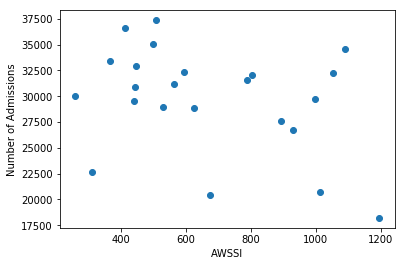

In [31]:
# fit a linear regression and predict alcoholisim admissions using one feature, the winter weather index

plt.scatter(X_AWSSI, y) 
plt.ylabel('Number of Admissions') 
plt.xlabel('AWSSI') 
plt.show()


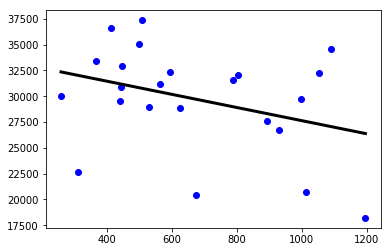

In [33]:
"""Fit a regression model. Create a regressor: reg, create the prediction space, fit the model to the data,
compute predictions over the prediction space, and plot the regression line."""

from sklearn import linear_model 
reg = linear_model.LinearRegression() 
reg.fit(X_AWSSI, y) 

prediction_space = np.linspace(min(X_AWSSI),  
                          max(X_AWSSI)).reshape(-1, 1) 
plt.scatter(X_AWSSI, y, color='blue') 
plt.plot(prediction_space, reg.predict(prediction_space),
   color='black', linewidth=3) 
plt.show()


In [34]:
print("One feature linear regression R^2: {:.2f}".format(reg.score(X_AWSSI, y)))

One feature linear regression R^2: 0.12


In [35]:
# Train/test, coefficient, intercept

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X = X_AWSSI 
X, y = X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))



Training set score: 0.12
Test set score: -0.01


In [36]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[-5.94067033]]
lr.intercept_: [ 34403.9199438]
